# Tarea 6. Embeddings and CNNs

Guillermo Segura Gomez

## Word2Vec

**Estudie los papers de word2vec (a y b). Consteste las siguientes preguntas en sus propias palabras.**

**1. ¿Describa en sus propias palabras la estrategia de selección de palabras dentro de la ventana de contexto en w2v? Explique porque se hace así y cual es la intuición.**

Lo primero es definir la ventana de contexto. En el articulo *Efficient Estimation of Word Representations in Vector Space* [2], Mikolov propone un modelo llamado **continuous skip-gram model** en el que trata de maximizar la clasificación de una palabra basado en otra palabra de la misma oración. Es decir, y cito textualmente "Se usa cada palabra actual como entrada para un clasificador log-lineal con una capa de proyección continua y predice palabras dentro de un cierto rango antes y después de la palabra actual". El rango o distancia maxima entre las palabras que se pueden seleccionar para este análisis se conoce como **ventana de contexto**, representada por la letra $C$. La estrategia que se utiliza para la selección de palabras dentro de la ventana es una estrategia aleatoria. Para cada palabra del conjunto de entrenamiento se selecciona de manera random un numero entero $R$ en el rango $[1,C]$, luego se seleccionan $R$ palabras anteriores y $R$ palabras posteriores a la palabra objetivo como el contexto actual para ese ejemplo de entrenamiento. La intuición detrás de esto es que no todas las palabras dentro de la ventana de contexto son seleccionadas con igual probabilidad, es necesario agregar este comportamiento aleatorio para evitar que el modelo se sobreajuste a ciertas ventanas de contexto y poder capturar la mayor cantidad de información sintáctica y semántica posible. De otra forma tendríamos un modelo de n-gramas simple, el cual hemos visto que presenta complicaciones para modelar el lenguaje a profundidad. 

**2. ¿Qué estrategia se usa para construir frases de palabras y construir un solo vector para conceptos basados en más de un token?**

En el articulo *Distributed Representations of Words and Phrases and their Compositionality* [1], Mikolov habla acerca de que el modelo de skip-grams puede aprender conceptos mas profundos que una sola palabra. Y es que por lo que entiendo la idea de los modelos tipo embeddings es *linealidad* el lenguaje, es decir, poder encontrar representaciones de palabras con las cuales podamos mediante operaciones vectoriales lineales, podamos llegar a otros vectores de palabras que tengan sentido semántico; por ejemplo *vector("King")* - *vector(Man)* + *vector(Woman)* = *vector(Queen)*. Es asi, que hay muchas *frases* cuyo significado no es una composición simple de significados de palabras individuales. Para que el modelo pueda aprender este tipo de frases, se tiene que realizar un preproceso para poder construir estas frases en el corpus y que cada frase tenga un token único. Me parece que la estrategia que se sigue es primero buscar los conjuntos de palabras que por si mismo aparecen de manera muy rara en contextos únicos. Por ejemplo "New York Times" que involucra tres palabras. Luego es necesario construir un token único de esta palabra y agregarlo al corpus. Para construir el token único se pueden agregar guiones para tener "New_York_Times" y con esto poder conseguir frases de palabras que se aprendan por si mismas en el modelo.

**3. ¿Según el autor de w2v, cuales podrían ser las diferencias o ventajas/desventajas de CBOW y Skipgram?**

En el articulo donde se proponen los modelos de embeddings [2], nos damos cuenta de que son modelos con ideas similares, aunque opuestas. El modelo de CBOW predice la palabra actual basándose en el contexto de su alrededor mientras que el modelo se skip-grams se intenta predecir las palabras de contexto a partir de la palabra actual. En general el modelo CBOW es el más rápido entrenar. Sin embargo el modelo skip-grams es más efectivo para aprender representaciones de alta calidad para palabras raras, ya que trata cada instancia de la palabra objetivo como un ejemplo de entrenamiento único. Si se desea escoger uno de los modelos se tiene que hacer en base a las necesidades y disponibilidad de hardware que se tenga, CBOW es mas eficiente, y funciona bien para conjuntos peque;os de datos, mientas que skip-gram es brutal para conjuntos grandes y para aprender palabras extra;as en el contexto.

**4. ¿Cuales son las diferencias entre usar Hierachical Softmax, Negative Sampling y NCE? ¿Cuál recomienda el autor y por qué?**

Para responder esta pregunta, es necesario conocer como se calculan las probabilidades de una red neuronal. Para una neurona simple, una red neuronal recibe una cantidad de inputs y los procesa mediante la multiplicación por los pesos y la suma del bias. Luego se aplica una función no lineal, y finalmente se calcula la probabilidad mapeando la salida de la función no lineal que va de $(-\infty, \infty)$ a un valor entre $[0,1]$, una probabilidad. Este mapeo se hace utilizando la función softmax. Sin embargo hay complicaciones a la hora de manejar grandes volúmenes de datos ya que el costo computacional aumenta. Hierarchical Softmax, Negative Sampling y Noise Contrastive Estimation son técnicas utilizadas para optimizar este problema. Estas funciones consisten en lo siguiente:

* Hierarchical Softmax

    Esta técnica usa un árbol binario para representar las palabras, reduciendo significativamente la complejidad computacional de calcular las probabilidades de salida desde O(W)O(W) a O(log⁡2(W))O(log2​(W)). Aunque es eficiente para grandes vocabularios, su rendimiento depende mucho de cómo esté estructurado el árbol. Esto la hace muy útil para acelerar el entrenamiento, especialmente con palabras frecuentes que reciben códigos más cortos.

* Noise Contrastive Estimation (NCE)

    NCE se propone como una forma de entrenar modelos diferenciando datos reales de una distribución de ruido a través de regresión logística. Es conceptualmente más compleja y requiere ajustes precisos, pero proporciona una base teórica sólida para la estimación eficiente de los parámetros del modelo.

* Negative Sampling (NEG)

    Negative Sampling es una simplificación de Noise Contrastive Estimation que mejora la velocidad de entrenamiento al enfocarse en diferenciar la palabra objetivo de unas pocas muestras negativas en lugar de todo el vocabulario. Es menos preciso que Hierarchical Softmax para datasets pequeños pero escala maravillosamente bien para conjuntos de datos más grandes, haciendo que el entrenamiento sea viable incluso con vocabularios extremadamente grandes.


Aunque Hierarchical Softmax y NCE tienen sus méritos, Mikolov favorece el uso de Negative Sampling para la mayoría de las aplicaciones prácticas del modelo Skip-gram. NEG no solo simplifica enormemente el proceso de entrenamiento sino que también provee una eficiencia excepcional sin sacrificar la calidad de las representaciones vectoriales aprendidas. Es especialmente útil para conjuntos de datos grandes, donde un número pequeño de muestras negativas puede ser suficiente para mantener un alto rendimiento.

**5. ¿Cual diría usted que es la principal conclusión y aportación del paper de w2v? ¿Qué crítica haría usted a estos papers de w2v?**

Bueno, me parecieron increíbles. Me pareció super wao que pude leerlos y entender la mayoría sin problemas. Creo que la aportación mas importante de w2v es la capacidad de poder producir representaciones vectoriales de palabras que tengan sentido matemático y semántico. Me voló la cabeza el hecho de que las operaciones vectoriales conducían a significados semánticos. El lenguaje es algo que evoluciona en el tiempo, que no tiene muchas relaciones aparentes y que es difícil de modelar, y contar con una herramienta como word2vec, con la cual es posible fácilmente encontrar este tipo de relaciones matemáticas es increíble, me parece increíble lo que después podríamos encontrar. Mi critica es muy positiva, creo que son fáciles de leer y de entender, ademas de que citan todas las fuentes de datos que utilizaron para los entrenamientos. Lo único que me hubiera gustado es una explicación mas detallada de como se plantearon y funcionan las propuestas CBOW y skip-grams. 

## Glove

**Lea el paper de Glove y explique brevemente los siguientes puntos:**

**1. ¿Qué desventaja trata de solucionar de W2V?**

En el articulo [3], se habla acerca de los modelos de generación de espacios vectoriales semánticos. Concretamente los propuestos por Mikolov con los llamados por el autor como **Métodos de ventana poco profunda**, los cuales utilizan el contexto local para generar vectores de representación de palabras en una ventana de contexto. La desventaja que se plantea en el articulo es que mientras otros modelos como el LSA aprovechan la información estadística contenida en todo el corpus, los modelos w2v no operan con las co-ocurrencias estadísticas del corpus, sino que se limitan a utilizar una ventana a traves de todo el corpus, desaprovechando la ventaja de la cantidad de repetición de palabras en el corpus. 

**2. Describa en sus propias palabras y de manera general cual es la principal estrategia para lograrlo.**

Para poder superar las limitaciones de w2v Pennington, Jeffrey y Socher proponen GloVe por *global vectors* vectores globales. GloVe busca superar las limitaciones de Word2Vec mediante la implementación de un modelo que combina la fuerza de los métodos basados en la matriz de co-ocurrencia (LSA), que toman en cuenta la estadística del texto con la eficiencia de los modelos predictivos, (skip-grams) los cuales utilizan una ventana de contexto. GloVe utiliza una matriz global de co-ocurrencias para todo el corpus, capturando así la frecuencia con la que cada palabra aparece en el contexto de las otras. Este enfoque permite que GloVe no solo considere la información local de la ventana de contexto, sino también las estadísticas globales del corpus, solventando los problemas de cada modelo por separado, proporcionando una gran captura de las relaciones semánticas entre las palabras.

**3. Explique en sus propias palabras las principales conclusiones de los experimentos. Comente si cree que se logró el objetivo.**

Los experimentos realizados en el desarrollo de GloVe demuestran que el modelo es capaz de capturar subestructuras intrincadas del espacio semántico más eficazmente que los modelos anteriores, como Word2Vec o LSA, especialmente en tareas de analogía de palabras. Las pruebas que se hicieron en el articulo muestran que los embeddings de GloVe retienen una cantidad significativa de varianza semántica y sintáctica, lo cual era el objetivo principal. Creo firmemente que se logró el objetivo de combinar eficazmente la información global y local del corpus para producir representaciones vectoriales más informativas y precisas.

**4. ¿Encuentra alguna relación entre Glove y las clasicas TCOR y DOR? ¿Cuáles?**

Realmente si hay una relación conceptual con TCOR Y DOR en el sentido de que todos estos enfoques se basan en la observación de cómo las palabras coexisten y se distribuyen en grandes corpus de texto. Sin embargo, GloVe innova sobre estas ideas al aplicar un modelo logarítmico y una función de ponderación que ayuda a mejorar la calidad de los embeddings al ajustar la influencia de las co-ocurrencias según su frecuencia, algo que no pasa en los métodos TCOR y DOR.

**5. ¿Cual diría usted que es la principal conclusión y aportación del paper de Glove? ¿Qué crítica haría usted a este paper de Glove?**

En el articulo de GloVe la principal aportación del paper de GloVe es demostrar que es posible mejorar significativamente la calidad de los embeddings de palabras integrando la información estadística global del corpus a través de una matriz de co-ocurrencia y combinarla con redes neuronales. Una posible crítica podría ser que, a pesar de su efectividad, la construcción y almacenamiento de grandes matrices de co-ocurrencia puede ser computacionalmente muy costosa y exigente en términos de memoria, lo que podría limitar su aplicabilidad en dispositivos con recursos limitados o con corpus extremadamente grandes.

## Otros papers

**Lea los papers de Directional Word2Vec, Fast Text, el de gnome-mining, así como el paper de CNNs de Kim y conteste.**

**1. ¿Qué desventaja trata de solucionar FastText y cómo lo logra?**

Una de las desventajas de los modelos w2v es que no pueden manejar palabras que están fuera del vocabulario. FastText aborda principalmente esta desventaja en el manejo de palabras fuera del vocabulario y en la captura de información morfológica de las palabras. Para solucionar este problema FastText utiliza subpalabras o n-gramas de caracteres dentro de cada palabra :o para aprender los embeddings. Por ejemplo, para la palabra "apple", FastText considerará subcadenas como "app", "ple", "appl", "e", y otros n-gramas de caracteres, dependiendo de los parámetros seleccionados. De esta manera, incluso si la palabra completa *apple* no está presente en el vocabulario, el modelo puede construir su vector a partir de los n-gramas que sí ha visto durante el entrenamiento. Esto no solo ayuda con las palabras fuera del vocabulario sino que también permite que el modelo refleje mejor la estructura morfológica de las palabras, capturando raíces, prefijos, sufijos y otras subunidades lingüísticas.

**2. ¿Cuál sería la principal desventaja de FastText vs Word2Vec?**

Una de las principales desventajas de FastText en comparación con Word2Vec es su mayor complejidad y requerimientos computacionales. Al considerar n-gramas de caracteres además de palabras completas, FastText genera y procesa muchos más datos durante el entrenamiento. FastText puede utilizar mucha mas memoria, además de tiempo de entrenamiento que un modelo w2v. A pesar de su innovación para poder manejar palabras nuevas, estas ventajas vienen con un costo de mayor complejidad computacional y uso de recursos. 

**3. ¿Qué desventaja trata de solucionar el paper de Directional W2V y cómo lo logra? Describa brevemente las conclusiones de la sección experimental.**

El modelo Directional w2v aborda la desventaja de los modelos tradicionales w2v que no consideran la dirección en la relación entre palabras. Estos modelos propuestos por Mikolov asumen que las palabras dentro de una ventana de contexto contribuyen igualmente al significado de la palabra objetivo, sin importar su posición relativa. Esta aproximación puede no capturar completamente la naturaleza direccional de las relaciones semánticas y sintácticas en el lenguaje. Para poder resolver esta problemática, el Directional W2V introduce un mecanismo que diferencia entre las palabras antes y después de la palabra objetivo en la ventana de contexto. 

La sección experimental del paper muestra que el Directional W2V puede mejorar significativamente el rendimiento en tareas que dependen de una comprensión precisa de la estructura lingüística, como el análisis sintáctico (part of speech tagging) o la desambiguación semántica (word similarity evaluation). Las pruebas empíricas sugieren que este enfoque captura mejor las relaciones contextuales, lo que resulta en una calidad superior de los embeddings y un mejor desempeño en comparación con el modelo estándar de Word2Vec. 

**4. ¿Qué se dice acerca del análisis de complejidad del Directional w2v?**

El modelo Directional Skip-Gram (DSG) aumenta ligeramente la complejidad en comparación con el modelo Skip-Gram (SG) estándar, tanto en términos de espacio como de tiempo, debido a la necesidad de gestionar un vector adicional para la dirección. Cada palabra en el DSG requiere solo una operación más que en el SG, lo que permite que el DSG mantenga una eficiencia comparable al SG, incluso cuando se amplía el contexto. A diferencia del modelo Symmetric Skip-Gram (SSG), que incrementa significativamente la complejidad al manejar múltiples embeddings de salida por cada dirección contextual, el DSG simplifica la estructura utilizando un único vector de palabra y un vector de dirección que predice explícitamente la orientación del contexto (izquierda o derecha).

**5. En el paper de gnome-mining, ¿Qué técnicas de NLP son usadas y con que objetivo intuitivo cada una?**

En el artículo sobre genome-mining, además de algunas técnicas de machine learning y deep learning, se utilizan dos técnicas principales de procesamiento de lenguaje natural para la identificación mejorada de los clusters biosintéticos de genes (BGCs) en genomas bacterianos. Estas técnicas son las Redes Neuronales Recurrentes (RNNs) específicamente en forma de Bidirectional Long Short-Term Memory (BiLSTM) y una red neuronal de tipo skip-gram que se denomina pfam2vec. Los objetivos de las técnicas son los siguientes:

* Bidirectional Long Short-Term Memory (BiLSTM):

    La BiLSTM se emplea para capturar la información contextual de las secuencias de datos tanto en la dirección hacia adelante como hacia atrás (bidireccional). Esto es crucial en la genómica, donde la función o característica de una secuencia puede ser influenciada fuertemente por sus segmentos adyacentes. Utilizar BiLSTM permite al modelo aprender de las dependencias a largo plazo y capturar mejor la estructura y las relaciones complejas en las secuencias genómicas, lo que resulta en una identificación más precisa de BGCs.

* Pfam2vec (skip-gram model):

    Similar a w2v en NLP, pfam2vec utiliza el método skip-gram para generar representaciones vectoriales (embeddings) de las familias de proteínas (Pfam). Estas representaciones son aprendidas de la misma palabra que las palabras pero ahora para proteínas. Este enfoque facilita la identificación de patrones y relaciones funcionales entre diferentes familias de proteínas, lo que es esencial para reconocer y caracterizar BGCs en genomas bacterianos.

**6. ¿En que problemas de clasificación evaluó Kim su CNN?**

Yoon Kim evaluó su modelo de CNN en múltiples conjuntos de datos de clasificación de texto que son benchmarks estándar en el campo del procesamiento de lenguaje natural. Estos incluyen:

MR: Movie reviews con una sola sentencia por opinión.
SST-1: Stanford Sentiment Treebank, un dataset con etiquetas de sentimiento a nivel de frase.
SST-2: Una versión binaria de SST-1.
Subj: Subjectivity dataset donde el objetivo es clasificar una oración como subjetiva u objetiva.
TREC: Un conjunto de datos de preguntas donde el objetivo es clasificar una pregunta en una de las seis categorías de pregunta.
CR: Customer reviews de productos donde cada opinión es sobre un atributo particular del producto.
MPQA: Opinion polarity detection subtask del MPQA dataset.

Estos datasets abarcan una variedad de tareas de clasificación de texto, desde análisis de sentimiento hasta clasificación de tipos de preguntas, lo cual proporciona una amplia evaluación del modelo.

**7. En los resultados dónde estuvo involucrado algún método de clasificación con SVM, ¿Cómo fue el resultado respecto a CNNs? ¿Qué features usaba el método basado en SVM?**

En el artículo, Kim comparó el rendimiento de las CNNs con modelos tradicionales basados en SVM. Las características utilizadas en los modelos basados en SVM incluían vectores de palabras y frases hechas a mano o características derivadas de modelos como bag of words. Los resultados mostraron que las CNNs, especialmente los modelos que utilizaban varias canales de palabras (multi-channel) con embeddings preentrenados y no actualizables, a menudo superaban o eran comparables a los modelos SVM en varias tareas. Esto destacó la efectividad de las CNNs para capturar características relevantes en textos cortos sin la necesidad de ingeniería de características extensiva, y es que principalmente las CNN eran desarrolladas para imágenes principalmente. 

**8. En sus propias palabras, ¿Qué diferencia tienen las estrategias multi-channel y single-channel?, ¿Cuál recomienda Kim?**

**Single-channel**: En esta configuración, Kim utilizó una sola capa de embeddings de palabras donde los embeddings podían ser actualizados (fine-tuned) durante el entrenamiento.

**Multi-channel**: En esta configuración, Kim utilizó dos sets de embeddings de palabras: uno donde los embeddings se mantienen estáticos y otro donde los embeddings pueden ser actualizados durante el entrenamiento.

Kim encontró que el enfoque multi-channel era beneficioso porque permitía que el modelo aprovechara la estabilidad de los embeddings preentrenados mientras experimentaba con modificaciones de estos embeddings para adaptarse a tareas específicas.

**9. ¿Cuál diría usted que es la principal conclusión y aportación del paper de Kim? ¿Qué crítica le haría usted a Kim?**

La principal aportación del trabajo de Kim fue demostrar que una arquitectura de CNN relativamente simple puede alcanzar un rendimiento de estado del arte en múltiples tareas de clasificación de texto sin necesidad de una ingeniería de características compleja. Esto abrió la puerta a investigaciones posteriores sobre modelos más sofisticados y especializados de CNNs para procesamiento de texto.

Una posible crítica al trabajo podría ser la dependencia en embeddings preentrenados, que aunque efectivos, podrían no ser óptimos para todas las tareas y pueden introducir sesgos basados en el corpus en el que fueron entrenados. Además, las CNNs pueden no capturar tan eficazmente las dependencias a largo plazo en el texto como otras arquitecturas, como por ejemplo las redes neuronales recurrentes (RNN).

## 4 CNNs

**Estudie superficialmente el siguiente [notebook](https://github.com/fagonzalezo/dl-tau-2017-2/blob/master/Handout-CNN-sentence-classification.ipynb). En esta tarea se le pro-porcionará el CNN-rand pero en Pytorch. Investigue lo necesario para completar el CNN-static y el CNN-non-static por usted mismo. Contruya la gŕafica de comparación de los tres.**

Las **Redes Neuronales Convolucionales (CNN)** son una clase de redes neuronales profundas que han demostrado ser extremadamente eficaces para tareas de análisis y clasificación de imágenes. Su éxito se debe a su capacidad para detectar patrones jerárquicos en los datos; por ejemplo, en imágenes, las primeras capas pueden detectar bordes, las capas intermedias pueden aprender a reconocer partes de objetos y las capas más profundas pueden identificar objetos completos.

Las CNN utilizan tres ideas clave que las hacen adecuadas para el procesamiento de imágenes y, más recientemente, para texto y otros tipos de datos secuenciales:
1. **Convoluciones Locales:** En lugar de aprender pesos globales como en las redes densas, las CNN aprenden pesos locales a través de filtros o kernels. Estos filtros se desplazan sobre la entrada para producir un mapa de características que resume la presencia de patrones específicos en diferentes ubicaciones de la entrada.
2. **Compartición de Parámetros:** El mismo filtro (con los mismos pesos) se aplica a diferentes partes de la entrada. Esto no solo reduce la cantidad de parámetros en el modelo, haciendo que la red sea más eficiente y menos propensa al sobreajuste, sino que también permite que el modelo generalice bien sobre datos espacialmente invariantes.
3. **Pooling:** Generalmente después de varias convoluciones, se utiliza una operación de pooling para reducir la dimensionalidad de los mapas de características, lo que ayuda a hacer que las representaciones sean más manejables computacionalmente y más robustas a las variaciones en la posición de los patrones dentro de las entradas.

### Variaciones de CNN para Clasificación de Texto

En el contexto de la clasificación de texto, Yoon Kim [7] en su modelo propuso variantes para manejar los embeddings de palabras:

**1. CNN-rand:**
- **Descripción:** En esta variante, los embeddings de palabras se inicializan aleatoriamente y se aprenden desde cero durante el entrenamiento del modelo. Es decir, los embeddings son tratados como parámetros del modelo que se ajustan para minimizar la función de pérdida durante el entrenamiento.
- **Uso:** Útil cuando no se dispone de embeddings preentrenados o cuando se desea explorar cómo un aprendizaje desde cero puede afectar el rendimiento del modelo.

**2. CNN-static:**
- **Descripción:** Los embeddings de palabras se inicializan con vectores preentrenados (como Word2Vec o GloVe) y se mantienen fijos durante el entrenamiento. Los embeddings no se ajustan, lo que significa que el aprendizaje se concentra en las capas superiores de la red.
- **Uso:** Adecuado cuando se confía en la calidad de los embeddings preentrenados y se desea que el modelo se concentre en aprender patrones de más alto nivel en los datos sin alterar la representación subyacente de las palabras.

**3. CNN-non-static:**
- **Descripción:** Similar a CNN-static pero, en este caso, los embeddings de palabras se inicializan con vectores preentrenados y luego se afinan durante el entrenamiento. Esto permite que el modelo ajuste los embeddings para adaptarlos mejor a la tarea específica de clasificación.
- **Uso:** Óptimo cuando los embeddings preentrenados son un buen punto de partida, pero se cree que pequeños ajustes a estos embeddings pueden mejorar el rendimiento en la tarea específica.

Vamos a implementar los tres modelos utilizando pytorch. 

### Modelo CNN-rand

Librerías 

In [1]:
# Tools
import os
import time
import random
import shutil
from argparse import Namespace
import matplotlib.pyplot as plt
from typing import Callable, Tuple

# Preprocessing
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import pandas as pd
import numpy as np

# PyTorch
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# word embeddings
from gensim.models import Word2Vec
from gensim.models.keyedvectors import Word2VecKeyedVectors

Seeds for reproducibility

In [2]:
args = Namespace()

args.seed = 1111
random.seed(args.seed) # python seed
np.random.seed(args.seed) # numpy seed
torch.manual_seed(args.seed) # torch seed
torch.backends.cudnn.benchmark = False # causes cuDNN to deterministically select algorithms for Neural Network operations
torch.backends.cudnn.deterministic = True # Use deterministic algorithms instead of non-deterministic where available

### Load Dataset

In [3]:
# Función que extrae el texto de dos archivos. Uno el de los documentos, otro el de las etiquetas
def get_text_from_file(path_corpus, path_truth):

    tr_text = []
    tr_labels = []

    with open(path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
        for tweet in f_corpus:
            tr_text += [tweet]
        for label in f_truth:
            tr_labels += [label]

    return tr_text, tr_labels

Set split hyperparameter and split data

In [4]:
args.val_size = 0.1

In [5]:
path_text = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/Data/MexData/mex20_train.txt"
path_labels = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/Data/MexData/mex20_train_labels.txt"

path_text_val = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/Data/MexData/mex20_val.txt"
path_labels_val = "/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/Data/MexData/mex20_val_labels.txt"

X_train = pd.read_csv(path_text, sep='\r\n', engine='python', header=None).loc[:,0]
y_train = pd.read_csv(path_labels, header=None).loc[:,0]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=args.val_size, random_state=args.seed)

X_test = pd.read_csv(path_text_val, sep='\r\n', engine='python', header=None).loc[:,0]
y_test = pd.read_csv(path_labels_val, header=None).loc[:,0]

Functions to build vocabulary

In [6]:
def get_vocab(corpus: pd.DataFrame,
              tokenizer: Callable[[str], list],
              max_features: int) -> set:
    freq_dist = FreqDist([w.lower() for sentence in corpus\
                                    for w in tokenizer(sentence)])

    sorted_words = sortFreqDict(freq_dist)[:min(max_features-1, len(freq_dist))]
    w2idx = {word: i+1 for i, word in enumerate(sorted_words)}

    # Append <pad> token with 0 index
    sorted_words.append('<pad>')
    w2idx['<pad>'] = 0

    return set(sorted_words), w2idx

def sortFreqDict(freq_dist: FreqDist) -> list:
    freq_dict = dict(freq_dist)
    return sorted(freq_dict, key=freq_dict.get, reverse=True)

In [7]:
# Set vocab size
args.vocab_size = 5000

tk = TweetTokenizer()
vocab, w2idx = get_vocab(X_train, tk.tokenize, args.vocab_size)

### Define Dataset, collate_fn and Dataloader

Define Map-style Dataset (one that implements the `__getitem__()` and `__len__()` protocols) class for processing each observation in the correct format for the model

In [8]:
class TweeterDataset(Dataset):
    def __init__(self,
                 X: pd.DataFrame,
                 y: pd.DataFrame,
                 vocab: set,
                 w2idx: dict,
                 tokenizer: Callable[[str], list],
                 max_seq_len: int):
        self.X = X
        self.y = y
        self.vocab = vocab
        self.w2idx = w2idx
        self.tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        # Get sequence of token ids
        sentence = self.X.iloc[idx]
        tokens = [self.w2idx[w] for w in self.tokenizer(sentence) if w in self.vocab]

        # Truncate sequence up to max_seq_len
        truncate_len = min(len(tokens), self.max_seq_len)
        tokens = tokens[:truncate_len]

        # Get true label
        label = self.y.iloc[idx]

        return torch.LongTensor(tokens), torch.LongTensor([label])

Define function to collate samples fetched by the sampler from the Dataset. The Dataloader will return the output of this `collate_fn` that we define.

In [9]:
def collate_fn(batch):
    # Get X
    batch_tokens = [row[0] for row in batch]
    # Get y
    batch_labels = torch.LongTensor([row[1] for row in batch]).to(torch.float)

    # Pad with 0 (to the rigth) shorter sequences than max_seq_len
    padded_batch_tokens = pad_sequence(batch_tokens, batch_first=True)

    return padded_batch_tokens, batch_labels.unsqueeze(1)

Build Dataloaders to process batches of observations from the Datasets

In [10]:
# Set batch size in args
args.batch_size = 64

# Num workers
args.num_workers = 0

# Maximum sequence length
args.max_seq_len = 20

In [11]:
# Training
train_dataset = TweeterDataset(X_train, y_train, vocab, w2idx, tk.tokenize, args.max_seq_len)
train_loader = DataLoader(train_dataset,
                          batch_size=args.batch_size,
                          num_workers=args.num_workers,
                          collate_fn=collate_fn,
                          shuffle=True)

# Validation
val_dataset = TweeterDataset(X_val, y_val, vocab, w2idx, tk.tokenize, args.max_seq_len)
val_loader = DataLoader(val_dataset,
                          batch_size=args.batch_size,
                          num_workers=args.num_workers,
                          collate_fn=collate_fn,
                          shuffle=False)

# Test
test_dataset = TweeterDataset(X_test, y_test, vocab, w2idx, tk.tokenize, args.max_seq_len)
test_loader = DataLoader(test_dataset,
                          batch_size=args.batch_size,
                          num_workers=args.num_workers,
                          collate_fn=collate_fn,
                          shuffle=False)

When iterating a ```Dataloader```, the whole order of execution to get a batch is roughly the following:

1. A `Sampler` object in `batch_sampler` variable, retrieves a batch of indices.

2. For each retrieved index, get the data from the defined `Dataset` object, process all the batch samples with the defined `collate_fn` and return the result:

    ```
    for indices in batch_sampler:
        yield collate_fn([dataset[i] for i in indices])
    ```




Testing train Dataloader

In [12]:
batch_ = next(iter(train_loader))
print(f'X_batch shape: {batch_[0].shape}')
print(f'y_batch shape: {batch_[1].shape}')

X_batch shape: torch.Size([64, 20])
y_batch shape: torch.Size([64, 1])


### Define CNN text classifier

In [13]:
class CNNTextCls(nn.Module):
    def __init__(self, args, embeddings=None, freeze=False):
        super(CNNTextCls, self).__init__()

        if embeddings is not None:
            self.emb = nn.Embedding.from_pretrained(torch.FloatTensor(embeddings))
            if freeze:
                self.emb.weight.requires_grad=False
        else:
            self.emb = nn.Embedding(args.vocab_size, args.d)

        conv_block_list = []

        for k in args.filter_sizes:
            conv_block = nn.Sequential(
                nn.Conv1d(in_channels=args.d, out_channels=args.num_filters, kernel_size=k, stride=1),
                nn.ReLU(),
                nn.MaxPool1d(kernel_size=(args.max_seq_len-k+1))
            )
            conv_block_list.append(conv_block)

        self.conv_block_list = nn.ModuleList(conv_block_list)
        self.dropout = nn.Dropout(args.dropout)
        self.fc = nn.Linear(args.num_filters*len(args.filter_sizes), 1)

    def forward(self, x):
        '''
        B: batch size
        L: sequence length
        D: embedding dim
        C: Convolution output channels (number of filters)
        k: Convolution kernel size
        N: Number of convolution blocks

        x shape: (B, L)
        '''
        x = self.emb(x) # (B, L, D)
        x = x.transpose(1,2) # (B, D, L) conv1d expects L in last dimension

        x_filter = []
        for conv_block in self.conv_block_list: # Conv1d -> ReLU -> MaxPool1d
            x_filter.append(conv_block(x).squeeze(2)) # (B, C, L-k+1) -> ReLU -> (B, C, 1) -> (B, C) after squeeze

        x_cat = torch.cat(x_filter, dim=1) # (B, C*N)
        x = self.dropout(x_cat)
        return self.fc(x)

### Helper functions for model evaluation

In [14]:
def model_eval(data, model, gpu=False):
    with torch.no_grad():
        preds, tgts = [], []
        for input, labels in data:
            if gpu:
                input = input.cuda()

            outputs = model(input)

            # Get prediction for Accuracy
            y_pred = y_pred = torch.round(torch.sigmoid(outputs.detach())).cpu().numpy()

            tgt = labels.numpy()
            tgts.append(tgt)
            preds.append(y_pred)

    tgts = [e for l in tgts for e in l]
    preds = [e for l in preds for e in l]

    metrics = {
        "accuracy": accuracy_score(tgts, preds),
    }

    return metrics

### Helper function to save model

In [15]:
def save_checkpoint(state, is_best, checkpoint_path, filename="checkpoint.pt"):
    filename = os.path.join(checkpoint_path, filename)
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, os.path.join(checkpoint_path, "model_best.pt"))

### Training function

In [16]:
def train(args, model, train_loader, val_loader, optimizer, criterion, scheduler):
    best_metric = 0
    metric_history = []
    train_metric_history = []

    for epoch in range(args.num_epochs):
        epoch_start_time = time.time()
        loss_epoch = []
        training_metrics = []
        model.train()

        for input, labels in train_loader:
            # If GPU available
            if args.use_gpu:
                input = input.cuda()
                labels = labels.cuda()

            # Forward pass
            outputs = model(input)

            loss = criterion(outputs, labels)
            loss_epoch.append(loss.item())

            # Get training metric
            preds = torch.round(torch.sigmoid(outputs.detach())).cpu().numpy()
            training_metrics.append(accuracy_score(labels.cpu().numpy(), preds))

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Get metric in training dataset
        mean_epoch_accuracy = np.mean(training_metrics)
        train_metric_history.append(mean_epoch_accuracy)

        # Get metric in validation dataset
        model.eval()
        tuning_metric = model_eval(val_loader, model, gpu=args.use_gpu)
        metric_history.append(tuning_metric['accuracy'])

        # Update scheduler
        scheduler.step(tuning_metric['accuracy'])

        # Check for metric improvement
        is_improvement = tuning_metric['accuracy'] > best_metric
        if is_improvement:
            best_metric = tuning_metric['accuracy']
            n_no_improve = 0
        else:
            n_no_improve += 1

        # Save best model if metric improved
        save_checkpoint(
            {
                "epoch": epoch + 1,
                "state_dict": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "scheduler": scheduler.state_dict(),
                "best_metric": best_metric,
            },
            is_improvement,
            args.savedir,
        )

        # Early stopping
        if n_no_improve >= args.patience:
            print("No improvement. Breaking out of loop.")
            break

        print ('Epoch [{}/{}], Loss: {:.4f} - Train Accuracy: {:.4f} - Val Accuracy: {:.4f} - Epoch time: {:.2f} s'
            .format(epoch+1, args.num_epochs, np.mean(loss_epoch), mean_epoch_accuracy, tuning_metric['accuracy'], (time.time()- epoch_start_time)))

    return train_metric_history, metric_history

### Train CNN classifier

In [47]:
# Model hyperparameters
args.d = 300 # Dimension of word embeddings
args.filter_sizes = [3, 4, 5]
args.num_filters = 100
args.dropout = 0.1

# Training hyperparameters
args.lr = 1e-2
args.num_epochs = 20
args.patience = 10

# Scheduler hyperparameters
args.lr_patience = 5
args.lr_factor = 0.5

# Saving directory
args.savedir = 'modelCNN-rand'
os.makedirs(args.savedir, exist_ok=True)

# Create model
model = CNNTextCls(args)

# Send to GPU
args.use_gpu = torch.cuda.is_available()
if args.use_gpu:
    model.cuda()

# Loss, Optimizer and Scheduler
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                optimizer, "max",
                patience=args.lr_patience,
                verbose=True,
                factor=args.lr_factor
            )

/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [48]:
start_time = time.time()
train_metric_history, val_metric_history = train(args, model, train_loader, val_loader, optimizer, criterion, scheduler)
print("Total training time: {:.4f} seconds".format((time.time() - start_time)))

Epoch [1/20], Loss: 0.6031 - Train Accuracy: 0.7096 - Val Accuracy: 0.7216 - Epoch time: 10.45 s
Epoch [2/20], Loss: 0.5807 - Train Accuracy: 0.7114 - Val Accuracy: 0.7216 - Epoch time: 7.81 s
Epoch [3/20], Loss: 0.5608 - Train Accuracy: 0.7129 - Val Accuracy: 0.7216 - Epoch time: 8.94 s
Epoch [4/20], Loss: 0.5427 - Train Accuracy: 0.7198 - Val Accuracy: 0.7405 - Epoch time: 10.89 s
Epoch [5/20], Loss: 0.5241 - Train Accuracy: 0.7392 - Val Accuracy: 0.7519 - Epoch time: 11.30 s
Epoch [6/20], Loss: 0.4972 - Train Accuracy: 0.7524 - Val Accuracy: 0.7386 - Epoch time: 9.72 s
Epoch [7/20], Loss: 0.4741 - Train Accuracy: 0.7766 - Val Accuracy: 0.7348 - Epoch time: 12.47 s
Epoch [8/20], Loss: 0.4534 - Train Accuracy: 0.7893 - Val Accuracy: 0.7557 - Epoch time: 9.04 s
Epoch [9/20], Loss: 0.4291 - Train Accuracy: 0.8096 - Val Accuracy: 0.7670 - Epoch time: 8.27 s
Epoch [10/20], Loss: 0.4049 - Train Accuracy: 0.8291 - Val Accuracy: 0.7614 - Epoch time: 8.35 s
Epoch [11/20], Loss: 0.3778 - Train

In [49]:
model.load_state_dict(torch.load('modelCNN-rand/model_best.pt')['state_dict'])
model.eval()
test_metric = model_eval(test_loader, model, gpu=args.use_gpu)
print("\nTest Accuracy: {:.4f}".format(test_metric["accuracy"]))


Test Accuracy: 0.7564


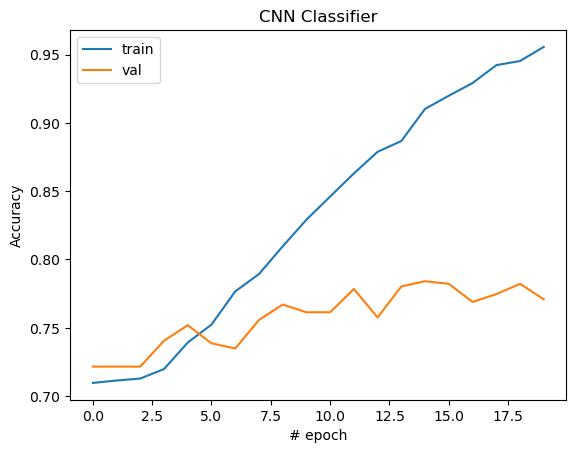

In [50]:
plt.plot(train_metric_history, label='train')
plt.plot(val_metric_history, label='val')
plt.title('CNN Classifier')
plt.ylabel('Accuracy')
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

## Modelo CNN-static

En este modelo necesitamos utilizar embeddings pre entrenados como los de w2v. Para realizar esto es necesario descargarlos de la siguiente [liga](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g). Luego cargamos los embeddings.

In [51]:
# Cargar el modelo Word2Vec preentrenado
model_w2v = Word2VecKeyedVectors.load_word2vec_format('/Users/guillermo_sego/Desktop/Segundo Semestre/PLN/Tareas/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [52]:
# Tamaño del vocabulario y dimensión de los embeddings
vocab_size = len(vocab)
embedding_dim = model_w2v.vector_size

# Crear una matriz de embeddings donde cada fila corresponde a un vector de embedding de una palabra
embedding_matrix = torch.zeros(vocab_size, embedding_dim)

for word, i in w2idx.items():
    if word in model_w2v:
        # Matriz de embeddings
        embedding_matrix[i] = torch.tensor(model_w2v[word]) # Convertir a tensor

In [53]:
print(f"La dimensión de los embeddings es: {embedding_matrix.shape[1]}")

La dimensión de los embeddings es: 300


Ahora ya que tenemos los embeddings cargados utilizamos el modelo con estos embeddings.

In [54]:
# Model hyperparameters
args.d = 300 # Dimension of word embeddings
args.filter_sizes = [3, 4, 5]
args.num_filters = 100
args.dropout = 0.1

# Training hyperparameters
args.lr = 1e-2
args.num_epochs = 20
args.patience = 10

# Scheduler hyperparameters
args.lr_patience = 5
args.lr_factor = 0.5

# Saving directory
args.savedir = 'modelCNN-static'
os.makedirs(args.savedir, exist_ok=True)

# Embeddings
args.embeddings = embedding_matrix

# Modelo estático
args.freeze = True

# Create model
model = CNNTextCls(args, embeddings=args.embeddings, freeze=args.freeze)

# Send to GPU
args.use_gpu = torch.cuda.is_available()
if args.use_gpu:
    model.cuda()

# Loss, Optimizer and Scheduler
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                optimizer, "max",
                patience=args.lr_patience,
                verbose=True,
                factor=args.lr_factor
            )

/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [55]:
start_time = time.time()
train_metric_history_static, val_metric_history_static = train(args, model, train_loader, val_loader, optimizer, criterion, scheduler)
print("Total training time: {:.4f} seconds".format((time.time() - start_time)))

Epoch [1/20], Loss: 0.6390 - Train Accuracy: 0.6659 - Val Accuracy: 0.7216 - Epoch time: 8.46 s
Epoch [2/20], Loss: 0.6028 - Train Accuracy: 0.7112 - Val Accuracy: 0.7216 - Epoch time: 7.55 s
Epoch [3/20], Loss: 0.6022 - Train Accuracy: 0.7097 - Val Accuracy: 0.7216 - Epoch time: 7.88 s
Epoch [4/20], Loss: 0.5994 - Train Accuracy: 0.7119 - Val Accuracy: 0.7216 - Epoch time: 9.86 s
Epoch [5/20], Loss: 0.5988 - Train Accuracy: 0.7112 - Val Accuracy: 0.7216 - Epoch time: 8.79 s
Epoch [6/20], Loss: 0.5979 - Train Accuracy: 0.7119 - Val Accuracy: 0.7216 - Epoch time: 7.99 s
Epoch [7/20], Loss: 0.5973 - Train Accuracy: 0.7119 - Val Accuracy: 0.7216 - Epoch time: 7.75 s
Epoch [8/20], Loss: 0.5976 - Train Accuracy: 0.7104 - Val Accuracy: 0.7216 - Epoch time: 8.66 s
Epoch [9/20], Loss: 0.5958 - Train Accuracy: 0.7119 - Val Accuracy: 0.7216 - Epoch time: 7.96 s
Epoch [10/20], Loss: 0.5972 - Train Accuracy: 0.7104 - Val Accuracy: 0.7216 - Epoch time: 9.07 s
No improvement. Breaking out of loop.
T

In [56]:
model.load_state_dict(torch.load('modelCNN-static/model_best.pt')['state_dict'])
model.eval()
test_metric = model_eval(test_loader, model, gpu=args.use_gpu)
print("\nTest Accuracy: {:.4f}".format(test_metric["accuracy"]))


Test Accuracy: 0.7121


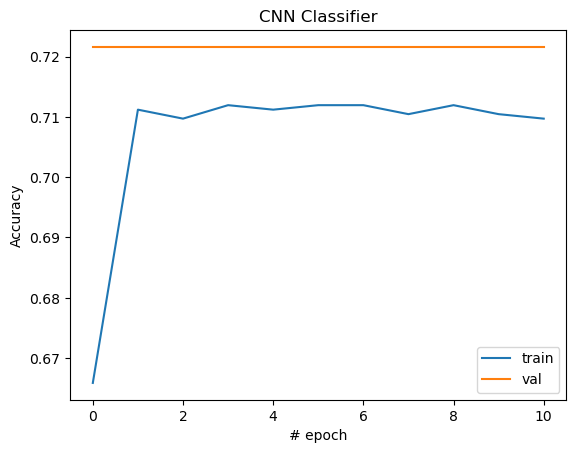

In [57]:
plt.plot(train_metric_history_static, label='train')
plt.plot(val_metric_history_static, label='val')
plt.title('CNN Classifier')
plt.ylabel('Accuracy')
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

## Modelo CNN-no static

Para implementar este modelo, los pesos de los embeddings pueden ser modificados durante el entrenamiento. Hay que desactivar la opción de **freeze** en el modelo para lograr esto.

In [58]:
# Model hyperparameters
args.d = 300 # Dimension of word embeddings
args.filter_sizes = [3, 4, 5]
args.num_filters = 100
args.dropout = 0.1

# Training hyperparameters
args.lr = 1e-2
args.num_epochs = 20
args.patience = 10

# Scheduler hyperparameters
args.lr_patience = 5
args.lr_factor = 0.5

# Saving directory
args.savedir = 'modelCNN-nostatic'
os.makedirs(args.savedir, exist_ok=True)

# Embeddings
args.embeddings = embedding_matrix

# Modelo no estático
args.freeze = False

# Create model
model = CNNTextCls(args, embeddings=args.embeddings, freeze=args.freeze)

# Send to GPU
args.use_gpu = torch.cuda.is_available()
if args.use_gpu:
    model.cuda()

# Loss, Optimizer and Scheduler
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                optimizer, "max",
                patience=args.lr_patience,
                verbose=True,
                factor=args.lr_factor
            )

/Users/guillermo_sego/anaconda3/envs/PLN/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [59]:
start_time = time.time()
train_metric_history_nstatic, val_metric_history_nstatic = train(args, model, train_loader, val_loader, optimizer, criterion, scheduler)
print("Total training time: {:.4f} seconds".format((time.time() - start_time)))

Epoch [1/20], Loss: 0.6351 - Train Accuracy: 0.6950 - Val Accuracy: 0.7216 - Epoch time: 7.30 s
Epoch [2/20], Loss: 0.6028 - Train Accuracy: 0.7112 - Val Accuracy: 0.7216 - Epoch time: 6.83 s
Epoch [3/20], Loss: 0.6003 - Train Accuracy: 0.7112 - Val Accuracy: 0.7216 - Epoch time: 7.06 s
Epoch [4/20], Loss: 0.5994 - Train Accuracy: 0.7104 - Val Accuracy: 0.7216 - Epoch time: 7.42 s
Epoch [5/20], Loss: 0.5977 - Train Accuracy: 0.7119 - Val Accuracy: 0.7216 - Epoch time: 8.28 s
Epoch [6/20], Loss: 0.5961 - Train Accuracy: 0.7127 - Val Accuracy: 0.7216 - Epoch time: 7.31 s
Epoch [7/20], Loss: 0.5966 - Train Accuracy: 0.7112 - Val Accuracy: 0.7216 - Epoch time: 7.28 s
Epoch [8/20], Loss: 0.5967 - Train Accuracy: 0.7104 - Val Accuracy: 0.7216 - Epoch time: 7.32 s
Epoch [9/20], Loss: 0.5952 - Train Accuracy: 0.7119 - Val Accuracy: 0.7216 - Epoch time: 7.28 s
Epoch [10/20], Loss: 0.5945 - Train Accuracy: 0.7119 - Val Accuracy: 0.7216 - Epoch time: 7.29 s
No improvement. Breaking out of loop.
T

In [60]:
model.load_state_dict(torch.load('modelCNN-nostatic/model_best.pt')['state_dict'])
model.eval()
test_metric = model_eval(test_loader, model, gpu=args.use_gpu)
print("\nTest Accuracy: {:.4f}".format(test_metric["accuracy"]))


Test Accuracy: 0.7121


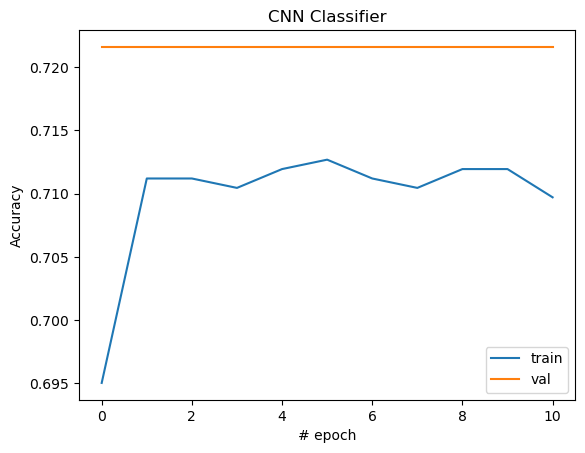

In [61]:
plt.plot(train_metric_history_nstatic, label='train')
plt.plot(val_metric_history_nstatic, label='val')
plt.title('CNN Classifier')
plt.ylabel('Accuracy')
plt.xlabel('# epoch')
plt.legend(loc='best')
plt.show()

## Comparación

Finalmente comparamos los tres modelos

Text(0, 0.5, 'Validation Accuracy')

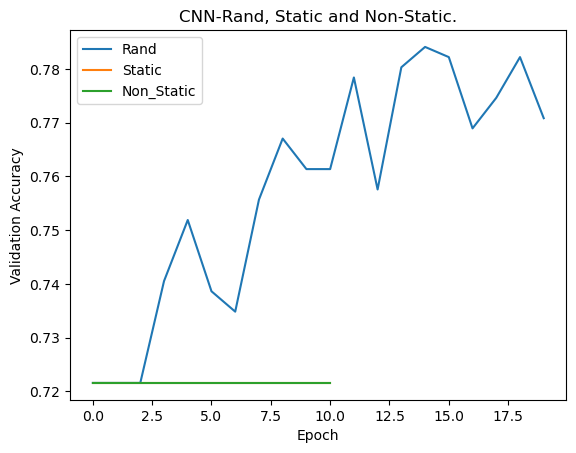

In [62]:
plt.plot(val_metric_history, label='Rand')
plt.plot(val_metric_history_static, label='Static')
plt.plot(val_metric_history_nstatic, label='Non_Static')
plt.title('CNN-Rand, Static and Non-Static.')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

## Referencias

[1] Mikolov, Tomas, et al. "Distributed representations of words and phrases and their compositionality." Advances in neural information processing systems 26 (2013).

[2] Mikolov, Tomas, et al. "Efficient estimation of word representations in vector space." arXiv preprint arXiv:1301.3781 (2013).

[3] Pennington, Jeffrey, Richard Socher, and Christopher D. Manning. "Glove: Global vectors for word representation." Proceedings of the 2014 conference on empirical methods in natural language processing (EMNLP). 2014.

[4] Song, Yan, et al. "Directional skip-gram: Explicitly distinguishing left and right context for word embeddings." Proceedings of the 2018 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies, Volume 2 (Short Papers). 2018.

[5] Bojanowski, Piotr, et al. "Enriching word vectors with subword information." Transactions of the association for computational linguistics 5 (2017): 135-146.

[6] Hannigan, Geoffrey D., et al. "A deep learning genome-mining strategy for biosynthetic gene cluster prediction." Nucleic acids research 47.18 (2019): e110-e110.

[7] Kim, Yoon. Convolutional Neural Networks for Sentence Classification. New York University, 2014.